In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Load the data
df = pd.read_csv('devc.csv', skiprows=1)  # Skip the first row with 's,C,C,C...'

# Display basic information
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset Overview:
Shape: (121, 10)
Columns: ['Time', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7', 'tc8', 'tc9']

First few rows:
    Time   tc1   tc2    tc3   tc4   tc5    tc6   tc7   tc8    tc9
0   0.00  20.0  20.0   20.0  20.0  20.0   20.0  20.0  20.0   20.0
1   5.01  20.0  20.0   20.0  20.0  20.0   20.0  20.0  20.0   20.0
2  10.00  20.2  20.2   21.3  20.1  20.1   21.8  20.3  20.2   21.5
3  15.00  20.5  25.5   61.4  20.4  21.0   56.6  20.6  26.0   64.7
4  20.00  20.9  24.4  120.0  20.8  21.7  109.0  20.9  24.1  119.0

Data types:
Time    float64
tc1     float64
tc2     float64
tc3     float64
tc4     float64
tc5     float64
tc6     float64
tc7     float64
tc8     float64
tc9     float64
dtype: object

Basic statistics:
             Time         tc1         tc2         tc3         tc4         tc5  \
count  121.000000  121.000000  121.000000  121.000000  121.000000  121.000000   
mean   300.000083   27.354545   43.570248  275.242975   28.579339   33.845455   
std    175.368519    3

In [ ]:
# Data cleaning and preparation
# Convert Time column to numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Get temperature columns (tc1-tc9)
temp_cols = [col for col in df.columns if col.startswith('tc')]
print(f"\nTemperature columns: {temp_cols}")

# Convert temperature columns to numeric
for col in temp_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Temperature columns: ['tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7', 'tc8', 'tc9']


In [7]:
print(df.shape)

(121, 10)


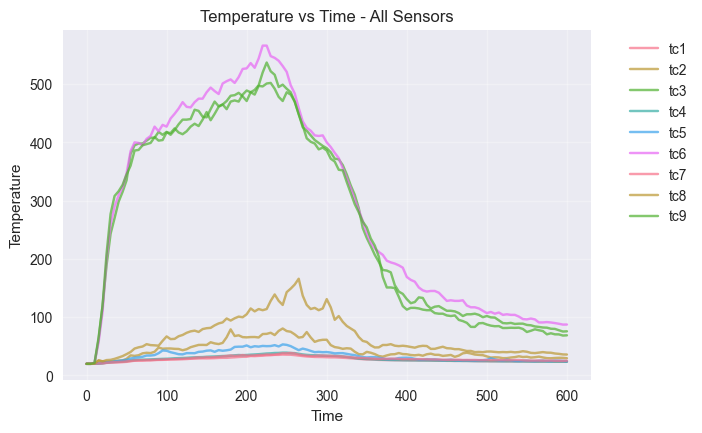

In [9]:
# 1. Time Series Analysis
plt.figure(figsize=(15, 10))

# Plot all temperature sensors over time
plt.subplot(2, 2, 1)
for col in temp_cols:
    plt.plot(df['Time'], df[col], label=col, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature vs Time - All Sensors')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'tc1'),
  Text(2, 0, 'tc2'),
  Text(3, 0, 'tc3'),
  Text(4, 0, 'tc4'),
  Text(5, 0, 'tc5'),
  Text(6, 0, 'tc6'),
  Text(7, 0, 'tc7'),
  Text(8, 0, 'tc8'),
  Text(9, 0, 'tc9')])

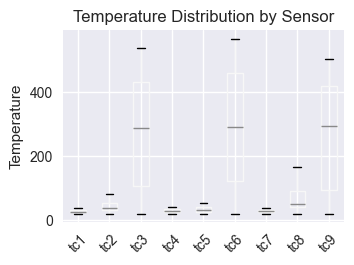

In [11]:
# 2. Temperature Distribution Analysis
plt.subplot(2, 2, 2)
df[temp_cols].boxplot()
plt.title('Temperature Distribution by Sensor')
plt.ylabel('Temperature')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Temperature Sensor Correlation')

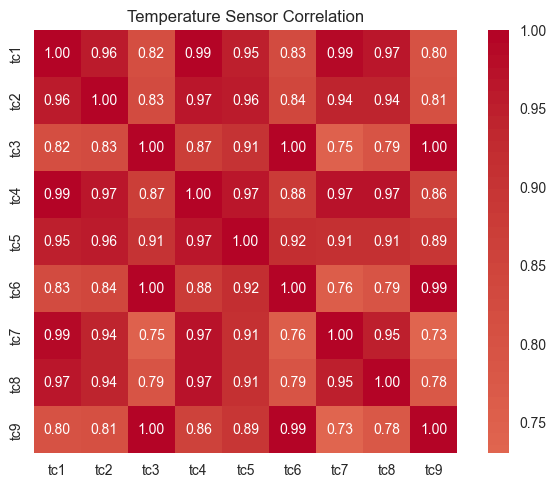

In [15]:
# 3. Correlation Heatmap
plt.subplot(1, 1, 1)
correlation_matrix = df[temp_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Temperature Sensor Correlation')

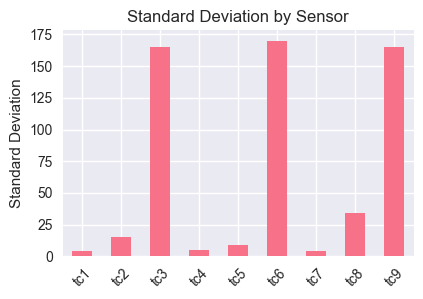

In [16]:
# 4. Temperature Statistics
plt.subplot(2, 2, 4)
temp_stats = df[temp_cols].describe()
temp_stats.loc['std'].plot(kind='bar')
plt.title('Standard Deviation by Sensor')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [25]:
# Statistical Analysis
print("\n" + "="*50)
print("STATISTICAL ANALYSIS")
print("="*50)

# Basic statistics for each sensor
print("\nTemperature Statistics by Sensor:")
for col in temp_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df_clean[col].mean():.2f}")
    print(f"  Std:  {df_clean[col].std():.2f}")
    print(f"  Min:  {df_clean[col].min():.2f}")
    print(f"  Max:  {df_clean[col].max():.2f}")
    # print(f"  Range: {df_clean[col].max() - df_clean[col].min():.2f}")


STATISTICAL ANALYSIS

Temperature Statistics by Sensor:

tc1:
  Mean: 27.35
  Std:  3.89
  Min:  20.00
  Max:  35.90

tc2:
  Mean: 43.57
  Std:  15.39
  Min:  20.00
  Max:  80.60

tc3:
  Mean: 275.24
  Std:  165.07
  Min:  20.00
  Max:  537.00

tc4:
  Mean: 28.58
  Std:  5.05
  Min:  20.00
  Max:  39.20

tc5:
  Mean: 33.85
  Std:  9.11
  Min:  20.00
  Max:  53.30

tc6:
  Mean: 292.42
  Std:  169.72
  Min:  20.00
  Max:  566.00

tc7:
  Mean: 28.91
  Std:  4.22
  Min:  20.00
  Max:  38.70

tc8:
  Mean: 66.57
  Std:  34.20
  Min:  20.00
  Max:  166.00

tc9:
  Mean: 267.76
  Std:  164.73
  Min:  20.00
  Max:  502.00


In [18]:
# Temperature differences and trends
print("\nTemperature Analysis:")
print(f"Overall temperature range: {df_clean[temp_cols].min().min():.2f} - {df_clean[temp_cols].max().max():.2f}")
print(f"Average temperature across all sensors: {df_clean[temp_cols].mean().mean():.2f}")

# Find sensors with highest and lowest temperatures
max_temp_sensor = df_clean[temp_cols].max().idxmax()
min_temp_sensor = df_clean[temp_cols].min().idxmin()
print(f"Sensor with highest temperature: {max_temp_sensor} ({df_clean[max_temp_sensor].max():.2f})")
print(f"Sensor with lowest temperature: {min_temp_sensor} ({df_clean[min_temp_sensor].min():.2f})")

# Temperature variation analysis
print("\nTemperature Variation Analysis:")
temp_variation = df_clean[temp_cols].std()
print(f"Sensor with highest variation: {temp_variation.idxmax()} (std: {temp_variation.max():.2f})")
print(f"Sensor with lowest variation: {temp_variation.idxmin()} (std: {temp_variation.min():.2f})")


Temperature Analysis:
Overall temperature range: 20.00 - 566.00
Average temperature across all sensors: 118.25
Sensor with highest temperature: tc6 (566.00)
Sensor with lowest temperature: tc1 (20.00)

Temperature Variation Analysis:
Sensor with highest variation: tc6 (std: 169.72)
Sensor with lowest variation: tc1 (std: 3.89)



ADVANCED ANALYSIS


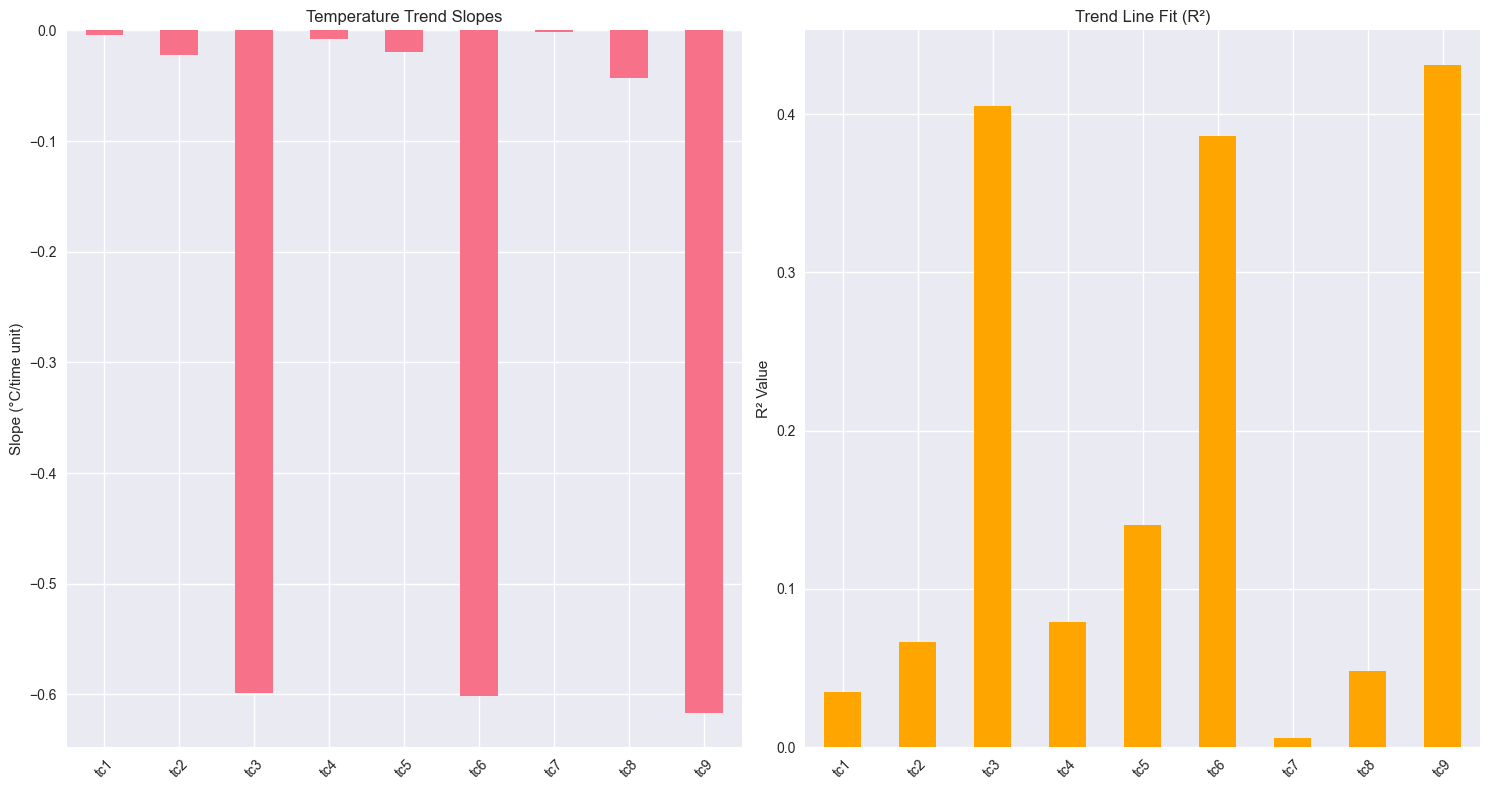


Temperature Trends:
tc1: decreasing trend (slope: -0.0041, R²: 0.035)
tc2: decreasing trend (slope: -0.0226, R²: 0.066)
tc3: decreasing trend (slope: -0.5990, R²: 0.405)
tc4: decreasing trend (slope: -0.0081, R²: 0.079)
tc5: decreasing trend (slope: -0.0195, R²: 0.141)
tc6: decreasing trend (slope: -0.6013, R²: 0.386)
tc7: decreasing trend (slope: -0.0018, R²: 0.006)
tc8: decreasing trend (slope: -0.0427, R²: 0.048)
tc9: decreasing trend (slope: -0.6169, R²: 0.431)


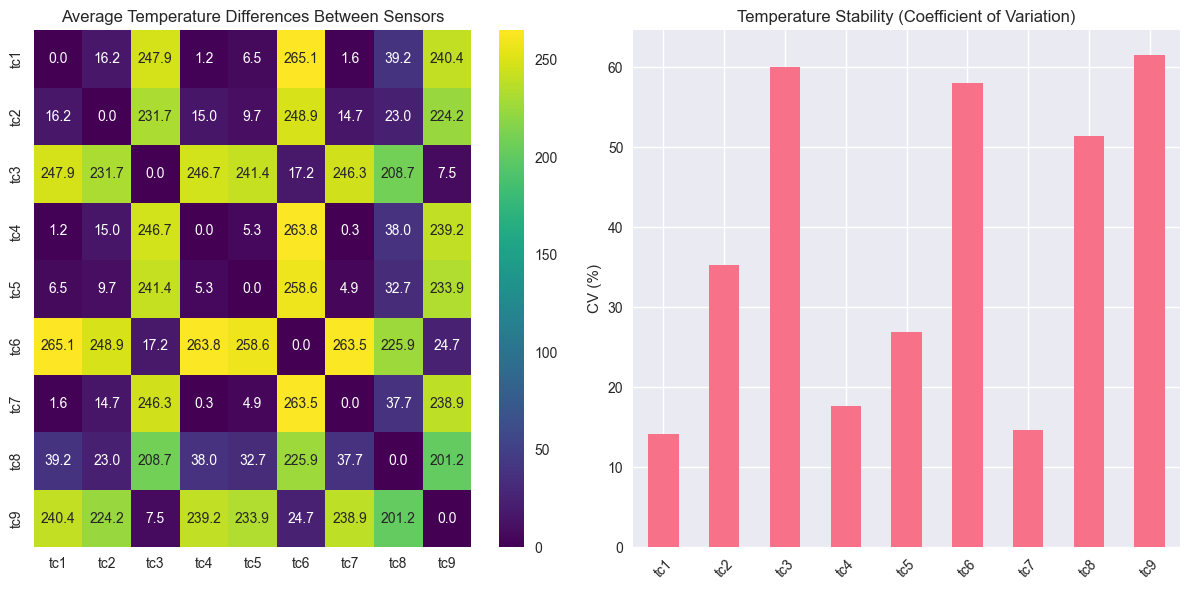


Time-based Analysis:
Total time span: 600.0 time units
Average sampling interval: 4.96 time units
Time with highest temperature change: 25.0

Anomaly Detection:
tc1: 0 outliers detected
tc2: 0 outliers detected
tc3: 0 outliers detected
tc4: 0 outliers detected
tc5: 0 outliers detected
tc6: 0 outliers detected
tc7: 0 outliers detected
tc8: 0 outliers detected
tc9: 0 outliers detected

SUMMARY REPORT
• Dataset contains 121 time points
• 9 temperature sensors analyzed
• Temperature range: 20.0°C to 566.0°C
• Most variable sensor: tc6
• Most stable sensor: tc1
• Average temperature: 118.3°C
• Time span: 600.0 time units


In [19]:
# Advanced Analysis
print("\n" + "="*50)
print("ADVANCED ANALYSIS")
print("="*50)

# 1. Temperature trends over time
plt.figure(figsize=(15, 8))

# Calculate temperature trends (slope of linear regression)
trends = {}
for col in temp_cols:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Time'], df_clean[col])
    trends[col] = {'slope': slope, 'r_squared': r_value**2, 'p_value': p_value}

# Plot trends
plt.subplot(1, 2, 1)
trend_data = pd.DataFrame(trends).T
trend_data['slope'].plot(kind='bar')
plt.title('Temperature Trend Slopes')
plt.ylabel('Slope (°C/time unit)')
plt.xticks(rotation=45)

# Plot R-squared values
plt.subplot(1, 2, 2)
trend_data['r_squared'].plot(kind='bar', color='orange')
plt.title('Trend Line Fit (R²)')
plt.ylabel('R² Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print trend analysis
print("\nTemperature Trends:")
for sensor, data in trends.items():
    direction = "increasing" if data['slope'] > 0 else "decreasing"
    print(f"{sensor}: {direction} trend (slope: {data['slope']:.4f}, R²: {data['r_squared']:.3f})")

# 2. Temperature differences between sensors
plt.figure(figsize=(12, 6))

# Calculate pairwise differences
diff_matrix = np.zeros((len(temp_cols), len(temp_cols)))
for i, col1 in enumerate(temp_cols):
    for j, col2 in enumerate(temp_cols):
        diff_matrix[i, j] = abs(df_clean[col1].mean() - df_clean[col2].mean())

plt.subplot(1, 2, 1)
sns.heatmap(diff_matrix, xticklabels=temp_cols, yticklabels=temp_cols, 
            annot=True, cmap='viridis', fmt='.1f')
plt.title('Average Temperature Differences Between Sensors')

# Temperature stability analysis
plt.subplot(1, 2, 2)
stability = df_clean[temp_cols].std() / df_clean[temp_cols].mean() * 100  # Coefficient of variation
stability.plot(kind='bar')
plt.title('Temperature Stability (Coefficient of Variation)')
plt.ylabel('CV (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Time-based analysis
print("\nTime-based Analysis:")
time_range = df_clean['Time'].max() - df_clean['Time'].min()
print(f"Total time span: {time_range:.1f} time units")
print(f"Average sampling interval: {time_range / len(df_clean):.2f} time units")

# Find time periods with highest temperature changes
temp_change = df_clean[temp_cols].diff().abs().sum(axis=1)
max_change_time = df_clean.loc[temp_change.idxmax(), 'Time']
print(f"Time with highest temperature change: {max_change_time:.1f}")

# 4. Anomaly Detection
print("\nAnomaly Detection:")
for col in temp_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

# Summary Report
print("\n" + "="*50)
print("SUMMARY REPORT")
print("="*50)
print(f"• Dataset contains {len(df_clean)} time points")
print(f"• {len(temp_cols)} temperature sensors analyzed")
print(f"• Temperature range: {df_clean[temp_cols].min().min():.1f}°C to {df_clean[temp_cols].max().max():.1f}°C")
print(f"• Most variable sensor: {temp_variation.idxmax()}")
print(f"• Most stable sensor: {temp_variation.idxmin()}")
print(f"• Average temperature: {df_clean[temp_cols].mean().mean():.1f}°C")
print(f"• Time span: {time_range:.1f} time units")

# Export analysis results
analysis_results = {
    'basic_stats': df_clean[temp_cols].describe(),
    'correlation_matrix': correlation_matrix,
    'trends': pd.DataFrame(trends).T,
    'temperature_variation': temp_variation,
    'stability': stability
}


In [24]:
df_clean.to_csv("dfdevc.csv")